In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import re
import glob

In [2]:
swarm1={"red":"in_silico_bots/bot_2022_10_07_09_19_50_PM.history",
"green":"in_silico_bots/bot_2022_10_07_08_18_13_PM.history",
"blue":"in_silico_bots/bot_2022_10_07_09_21_08_PM.history",
"purple":"in_silico_bots/bot_2022_10_07_09_16_39_PM.history"}

swarm2={"red":"in_silico_bots/bot_2022_10_07_08_18_13_PM.history",
"green":"in_silico_bots/bot_2022_10_07_09_21_08_PM.history",
"blue":"in_silico_bots/bot_2022_10_07_09_19_50_PM.history",
"purple":"in_silico_bots/bot_2022_10_07_09_16_39_PM.history"}

swarm3={"red":"in_silico_bots/bot_2022_10_07_09_16_53_PM.history",
"green":"in_silico_bots/bot_2022_10_07_09_16_57_PM.history",
"blue":"in_silico_bots/bot_2022_10_07_09_23_09_PM.history",
"purple":"in_silico_bots/bot_2022_10_07_09_18_59_PM.history"}

swarm4={"red":"in_silico_bots/bot_2022_10_07_09_22_26_PM.history",
"green":"in_silico_bots/bot_2022_10_07_09_22_01_PM.history",
"blue":"in_silico_bots/bot_2022_10_07_08_18_26_PM.history",
"purple":"in_silico_bots/bot_2022_10_07_09_22_39_PM.history"}

swarm5={"red":"in_silico_bots/bot_2022_10_07_09_18_55_PM.history",
"green":"in_silico_bots/bot_2022_10_07_08_19_24_PM.history",
"blue":"in_silico_bots/bot_2022_10_07_09_22_34_PM.history",
"purple":"in_silico_bots/bot_2022_10_07_09_22_59_PM.history"}

swarm6={"red":"in_silico_bots/bot_2022_10_07_09_21_08_PM.history",
"green":"in_silico_bots/bot_2022_10_07_09_19_50_PM.history",
"blue":"in_silico_bots/bot_2022_10_07_08_18_13_PM.history",
"purple":"in_silico_bots/bot_2022_10_07_09_16_39_PM.history"}

swarm7 = {"red":'in_silico_bots/bot_2022_10_07_09_18_05_PM.history',
            "green":'in_silico_bots/bot_2022_10_07_09_20_52_PM.history',
            "blue":'in_silico_bots/bot_2022_10_07_08_18_20_PM.history',
            "purple":'in_silico_bots/bot_2022_10_07_09_19_30_PM.history'}

swarm8 = {"red":'in_silico_bots/bot_2022_10_07_08_18_13_PM.history',
            "green":'in_silico_bots/bot_2022_10_07_09_19_50_PM.history',
            "blue":'in_silico_bots/bot_2022_10_07_09_21_08_PM.history',
            "purple":'in_silico_bots/bot_2022_10_07_09_16_39_PM.history'}



swarm_dict = {"1":swarm1, "2":swarm2, "3":swarm3, "4":swarm4, "5":swarm5, "6":swarm6, "7":swarm7, "8":swarm8}

In [3]:
def parse_history_single_bot(file_name):

    f  = open(file_name, "r")
    str_file = f.read()
    f.close()

    lst_file = str_file.split(">>>")
    lst_file = lst_file[1:]
    
    parsed_all_data = []
    for line in lst_file:
        p_line = line.split(";")
        if len(p_line) <= 2:
            continue
        parsed_all_data.append(line.split(";"))

    x_list, y_list = [], []

    for list in parsed_all_data: 
        x_sum = 0
        y_sum = 0
        count = 0
        for data_points in list:
            points = data_points.split(",")
            points = points[:len(points) -1]

            if len(points) > 5: #get xy coords
                x_sum+=float(points[0])
                y_sum+=float(points[1])
                count+=1
        if count != 0:
            x_list.append(x_sum/count)
            y_list.append(y_sum/count)
 
    return x_list, y_list

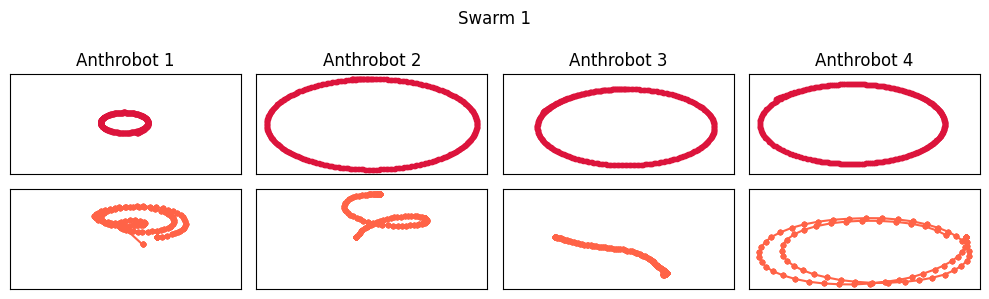

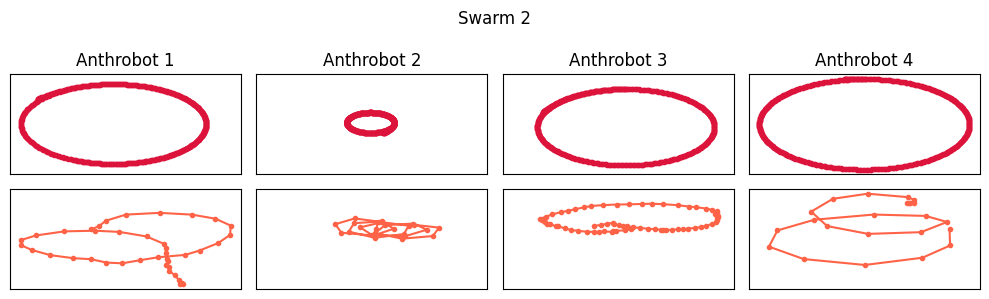

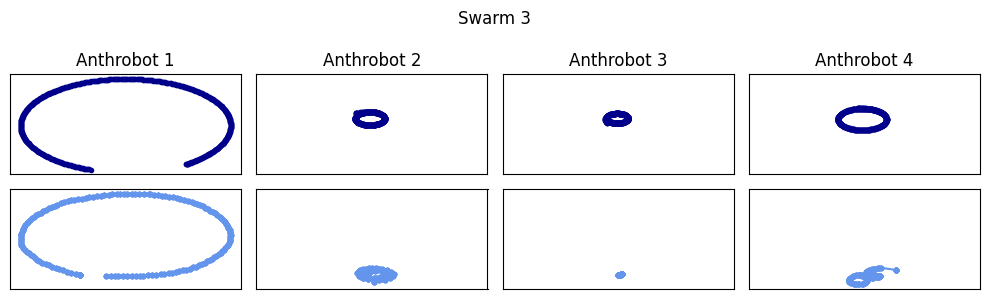

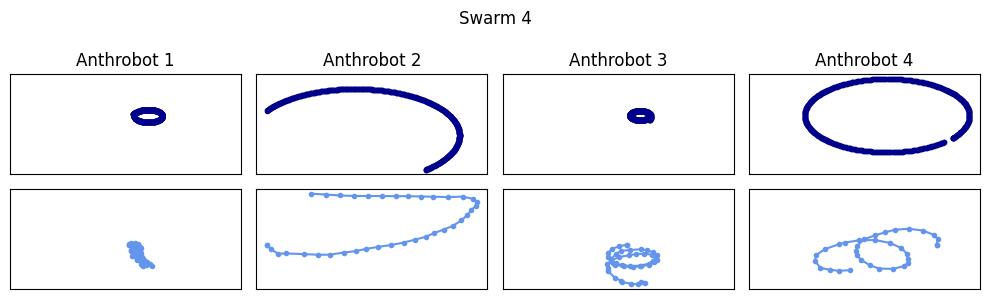

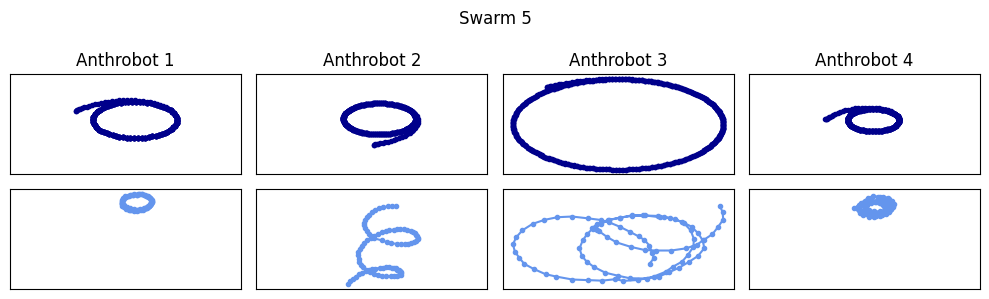

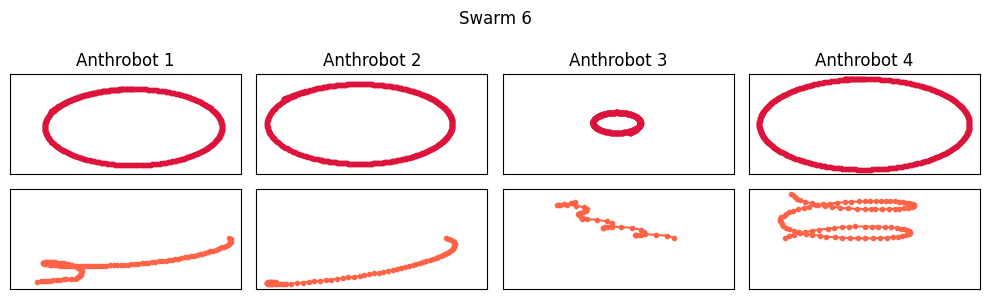

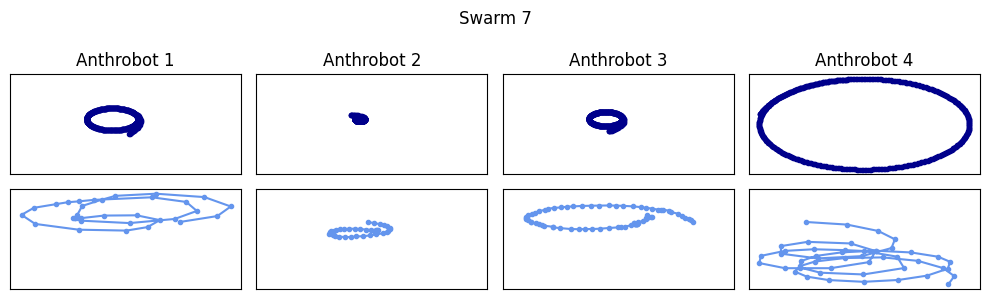

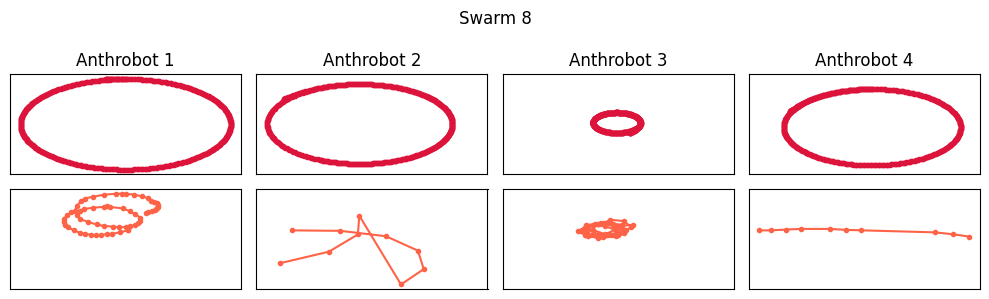

In [4]:
swarms = [1,2,3,4,5,6,7,8]
evolved = [1,2,6,8]
for swarm in swarms: 

    file_path = glob.glob(f'swarm_data\Swarm_{swarm}\*\*.csv')
    fig, ax = plt.subplots(2, 4, figsize = (10, 3), sharex='row', sharey='row')
    index = 0 
    for file in file_path:
        if 'Trial' in file: continue
        if (swarm == 1  or swarm == 3) and 'fixed.csv' not in file:
            continue
        df = pd.read_csv(file)
        try:
            color_match = re.search(r'Swarm\w_Bot\d_(\w+)_*', file)

            color = color_match.group(1)
            color = color.lower()
            color = color.split('bot')[0]
            color = color.split('_fixed')[0]
        except:
            color_match = re.search(r'Swarm\d_(\w+)Bot*', file)
            color = color_match.group(1)
            color = color.lower()
            color = color.split('bot')[0]
            color = color.split('_fixed')[0]

        x, y = parse_history_single_bot(swarm_dict[str(swarm)][color])
        x = np.array(x)
        y = np.array(y)
        color_silico = "crimson"
        color_vitro = "tomato"

        if swarm not in evolved: color_silico = "darkblue"
        if swarm not in evolved: color_vitro = "cornflowerblue"

        ax[0, index].plot(x - np.mean(x), y - np.mean(y), color=color_silico, marker = '.')
        ax[1, index].plot(df['x'] - np.mean(df['x']), (df['y'] - np.mean(df['y'][0])), color = color_vitro, marker='.')

        ax[0, index].set_xticks([])
        ax[1, index].set_xticks([])

        ax[0, index].set_yticks([])
        ax[1, index].set_yticks([])

        ax[0, index].set_title(f'Anthrobot {index+1}')
        index+=1


    plt.suptitle(f"Swarm {swarm}")
    plt.tight_layout()

    plt.show()